Importamos las librerias necesarias para manipular los datasets

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datasets y damos las primeras vistas

In [2]:
df=pd.read_csv("../data/DEvideos_cc50_202101.csv",index_col=False)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)


In [3]:
raw_categories=pd.read_json("../data/DE_category_id.json")
raw_categories.head()





,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40840 non-null  object 
 1   trending_date           40840 non-null  object 
 2   title                   40840 non-null  object 
 3   channel_title           40840 non-null  object 
 4   category_id             40840 non-null  int64  
 5   publish_time            40840 non-null  object 
 6   tags                    40840 non-null  object 
 7   views                   40840 non-null  int64  
 8   likes                   40840 non-null  int64  
 9   dislikes                40840 non-null  int64  
 10  comment_count           40840 non-null  int64  
 11  thumbnail_link          40840 non-null  object 
 12  comments_disabled       40840 non-null  bool   
 13  ratings_disabled        40840 non-null  bool   
 14  video_error_or_removed  40840 non-null

In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04,40840.000000,40840.000000
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03,51.797150,10.216911
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04,1.639008,2.042100
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,48.999992,6.970003
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01,50.266607,8.399993
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,52.029988,9.500030
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03,53.550025,11.416699
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,54.783748,14.329967


In [6]:
raw_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


In [7]:
raw_categories.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
freq,31,31,1


In [8]:
categories=raw_categories["items"].to_dict()
categories_list=[]
for item in categories.keys():
    category=[]
    category.append(categories[item]["id"])
    category.append(categories[item]["snippet"]["title"])
    categories_list.append(category)

In [9]:
categories_df=pd.DataFrame(categories_list)
categories_df.columns=['id', 'title']
categories_df

,id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Visualizaciones 

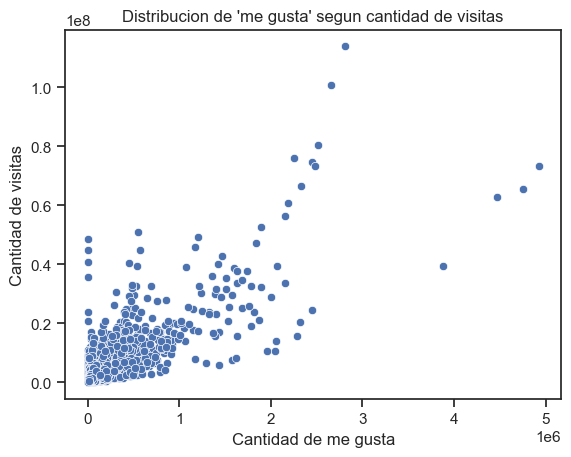

In [28]:
sns.set(style="ticks")
ax=sns.scatterplot(data=df,y="views",x="likes")
ax.set_ylabel('Cantidad de visitas')
ax.set_xlabel('Cantidad de me gusta')
ax.set_title("Distribucion de 'me gusta' segun cantidad de visitas")
plt.show()

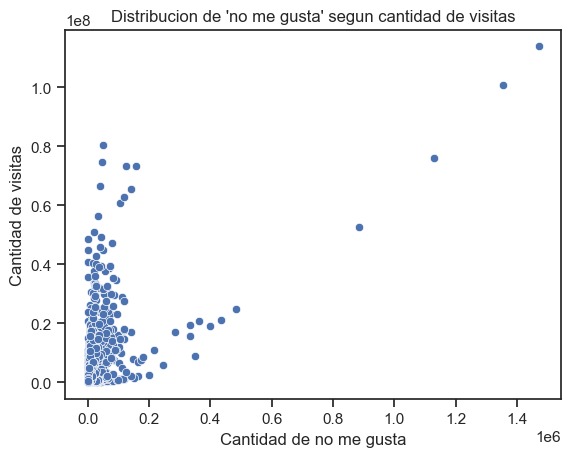

In [30]:
ax=sns.scatterplot(data=df,y="views",x="dislikes")
ax.set_ylabel('Cantidad de visitas')
ax.set_xlabel('Cantidad de no me gusta')
ax.set_title("Distribucion de 'no me gusta' segun cantidad de visitas")
plt.show()

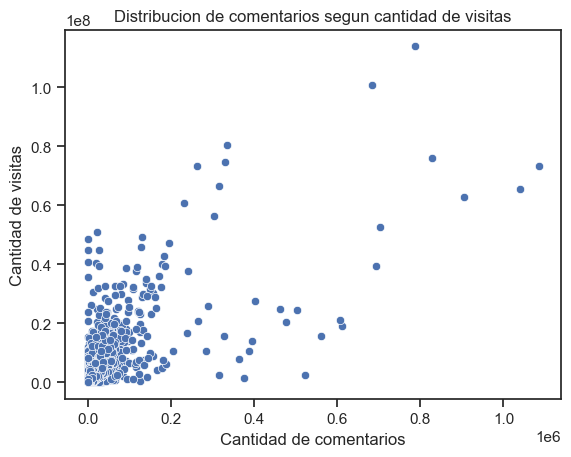

In [31]:
ax=sns.scatterplot(data=df,y="views",x="comment_count")
ax.set_ylabel('Cantidad de visitas')
ax.set_xlabel('Cantidad de comentarios')
ax.set_title("Distribucion de comentarios segun cantidad de visitas")
plt.show()

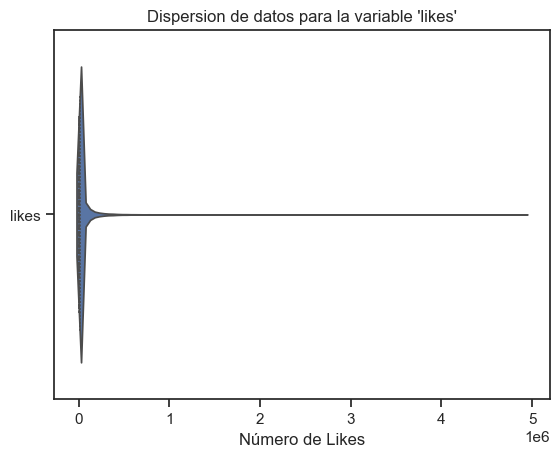

In [32]:
ax=sns.violinplot(data=df[['likes']], orient='h', inner="quartile")
ax.set_xlabel('Número de Likes')
ax.set_title("Dispersion de datos para la variable 'likes'")
plt.show()

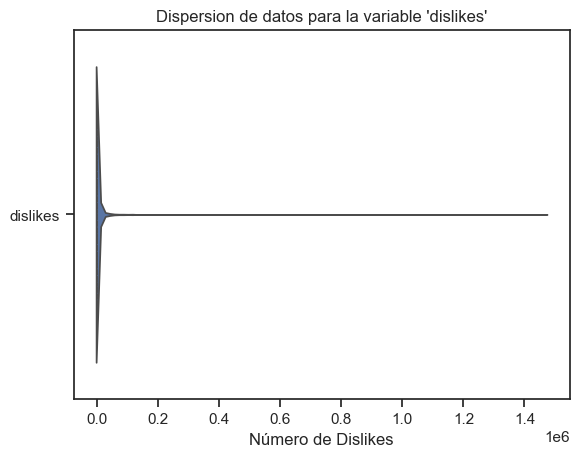

In [33]:
ax=sns.violinplot(data=df[['dislikes']], orient='h', inner="quartile")
ax.set_xlabel('Número de Dislikes')
ax.set_title("Dispersion de datos para la variable 'dislikes'")
plt.show()

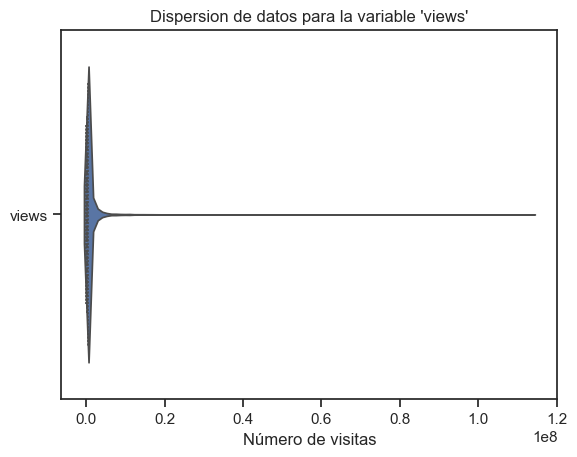

In [36]:
ax=sns.violinplot(data=df[['views']], orient='h', inner="quartile")
ax.set_xlabel('Número de visitas')
ax.set_title("Dispersion de datos para la variable 'views'")
plt.show()

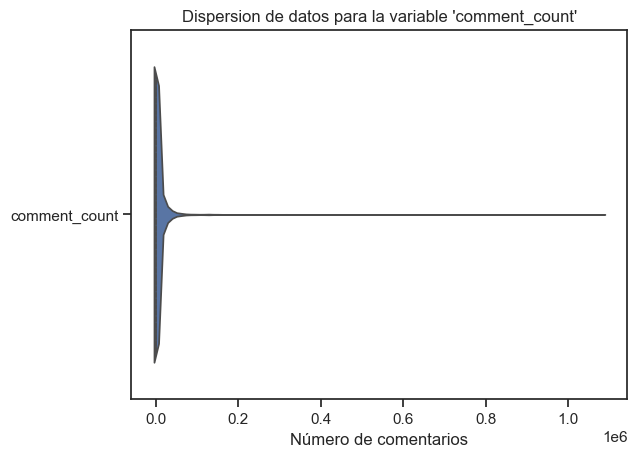

In [35]:
ax=sns.violinplot(data=df[['comment_count']], orient='h', inner="quartile")
ax.set_xlabel('Número de comentarios')
ax.set_title("Dispersion de datos para la variable 'comment_count'")
plt.show()

In [10]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [11]:
raw_categories.isna().sum()

kind     0
etag     0
items    0
dtype: int64

In [12]:
df = df.dropna(subset=['description'])

In [13]:
df.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import textblob
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
df['descripcion_procesada'] = df['description'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum()]))
df['descripcion_procesada'] = df['descripcion_procesada'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('german')]))

In [26]:
df['titulo_procesado'] = df['title'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum()]))
df['titulo_procesado'] = df['titulo_procesado'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('german')]))

In [27]:
df["description_polarity"]=df["descripcion_procesada"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
df["title_polarity"]=df["titulo_procesado" ].apply(lambda x: textblob.TextBlob(x).sentiment.polarity)

In [28]:
bins = [-1.1,-0.999,0.1,1.1]
labels = ['Negativo', 'Neutral', 'Positivo']
df['title_polarity'] = pd.cut(df['title_polarity'], bins=bins, labels=labels, right=True)

In [29]:
bins = [-1.1,-0.999,0.1,1.1]
labels = ['Negativo', 'Neutral', 'Positivo']
df['description_polarity'] = pd.cut(df['description_polarity'], bins=bins, labels=labels, right=True)

In [31]:
category_id=df['category_id']

In [32]:
df = pd.get_dummies(df, columns=['category_id'], prefix='category')

In [33]:
def obtener_estacion(fecha):
    fecha1=pd.to_datetime(fecha)
    mes = fecha1.month
    if 3 <= mes <= 5:
        return 'Primavera'
    elif 6 <= mes <= 8:
        return 'Verano'
    elif 9 <= mes <= 11:
        return 'Otoño'
    else:
        return 'Invierno'

In [34]:
df['publish_season']=df['publish_time'].apply(obtener_estacion)


In [95]:
df=pd.concat([df,category_id],axis=1)

In [ ]:
categories_df.columns = categories_df.columns.str.replace('title', 'category_name')
categories_df['id']=categories_df['id'].astype(int)

Guardando el dataset procesado

In [32]:
df.to_csv('../data/preprocessed_data.csv', index=False)